<a href="https://colab.research.google.com/github/subhankar-nitt/Fraud-detection-demo/blob/subhankar/mlProj/app/fraudtransactionsrules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ****Topic - Rule extraction for Fraud detection DataSet****
# ****Author-Subhankar Biswas ****
# ****Data- 22/06/2021****
# ****Description - In this notebook we will try to extract rules can be used to tag the database based on outliers.****

# **Loading the DataSet and exploring it**

In [ ]:
#importing the python libraries to be used in this session
import pandas as pd  #used for data analysis
import numpy as np #used for numerical calculations
import seaborn as sns #used for data visualization and plotting
import matplotlib.pyplot as plt  #used for data visualization and plotting
%matplotlib inline

In [ ]:
#reading the dataset
data = pd.read_csv("../input/fraud-detection/fraudTrain.csv")
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
#describing the dataset
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [ ]:
#info about all the columns in that dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
#length of the dataset
len(data)

1296675

In [ ]:
#columns in the dataset
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
#droping some components which are not used in pca analysis for the dataset
pca_data = data.drop(['Unnamed: 0','trans_num','city_pop','job','dob','category','cc_num','trans_date_trans_time','merchant','gender','first','last','state','city','street','zip'],axis=1)

In [ ]:
#the remaining columns to be used 
pca_data.columns

Index(['amt', 'lat', 'long', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud'],
      dtype='object')

In [ ]:
pca_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   amt         1296675 non-null  float64
 1   lat         1296675 non-null  float64
 2   long        1296675 non-null  float64
 3   unix_time   1296675 non-null  int64  
 4   merch_lat   1296675 non-null  float64
 5   merch_long  1296675 non-null  float64
 6   is_fraud    1296675 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 69.3 MB


In [ ]:
#splitting the dataset
pca_train=pca_data.drop('is_fraud',axis=1)
pca_test = pca_data['is_fraud']

In [ ]:
pca_train.head()


,amt,lat,long,unix_time,merch_lat,merch_long
0,4.97,36.0788,-81.1781,1325376018,36.011293,-82.048315
1,107.23,48.8878,-118.2105,1325376044,49.159047,-118.186462
2,220.11,42.1808,-112.2620,1325376051,43.150704,-112.154481
3,45.00,46.2306,-112.1138,1325376076,47.034331,-112.561071
4,41.96,38.4207,-79.4629,1325376186,38.674999,-78.632459


In [ ]:
pca_test.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

# **PCA Analysis on the dataset**

In [ ]:
#importing standard scaler library
from sklearn.preprocessing import StandardScaler

In [ ]:
#applying standard scaler to the dataset
scaler = StandardScaler()
scaler.fit(pca_train)
scaled = scaler.transform(pca_train)

In [ ]:
display(scaled)

array([[-0.40782607, -0.48441989,  0.65761961, -1.85866447, -0.49435433,
         0.59386386],
       [ 0.23003923,  2.03911997, -2.03387012, -1.85866244,  2.07869921,
        -2.03034087],
       [ 0.93414872,  0.7177536 , -1.60153717, -1.8586619 ,  0.90284908,
        -1.59232303],
       ...,
       [ 0.22193025, -1.10288318, -1.13325703,  1.75785644, -0.96243261,
        -1.08227231],
       [ 0.02837499,  0.94861347, -0.89502874,  1.75786142,  0.83205082,
        -0.94507404],
       [-0.41200532,  1.43931381, -1.71875438,  1.7578615 ,  1.57122907,
        -1.73985164]])

In [ ]:
#import PCA from sklearn
from sklearn.decomposition import PCA

In [ ]:
#Fitting the dataset in the PCA
pca = PCA(n_components=2)
pca.fit(scaled)
scaled_data = pca.transform(scaled)

<AxesSubplot:>

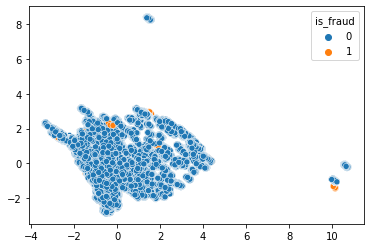

In [ ]:
#1st vs 2nd principle components
sns.scatterplot(x=scaled_data[:,0],y=scaled_data[:,1],hue=pca_test)

a class is there based on not fraud data but no clear class based on fraud data

In [ ]:
from sklearn.manifold import TSNE

<AxesSubplot:>

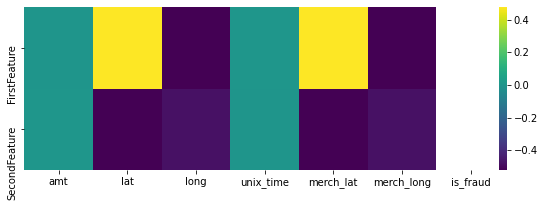

In [ ]:
#heatmap shows co relations between different columns 
plt.figure(figsize=(10,3))
sns.heatmap(pca.components_,cmap='viridis',yticklabels=['FirstFeature','SecondFeature'],xticklabels=pca_data.columns)

we can see here that if the lat and long has a different directions and the amt and unix time have same direction

# **Rule based on distance between the last two transactions and time difference**

In [ ]:
len(data['cc_num'].unique())

983

In [ ]:
#unique cards 
unique_cards=data.groupby(["cc_num"]).size().to_frame("no of time").reset_index()
unique_cards

,cc_num,no of time
0,60416207185,1518
1,60422928733,1531
2,60423098130,510
3,60427851591,528
4,60487002085,496
...,...,...
978,4958589671582726883,1476
979,4973530368125489546,1040
980,4980323467523543940,532
981,4989847570577635369,1007


In [ ]:
#function to calculate speed from the lat and long of two place
def getSpeed(lat1,lat2,lon1,lon2,time):
  rad = 6371 #radious of the earth is 6371

  #converting to radians for different 
  lat1=np.radians(lat1)  
  lat2=np.radians(lat2)
  lon1=np.radians(lon1)
  lon2=np.radians(lon2)

  #difference between two places latitude and longitude
  dlat = lat2-lat1
  dlon = lon2-lon1

  #formula to claculate the distance between two place
  a = np.sin(dlat/2)**2+np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2

  c = np.sqrt(a)
  #distance / time = speed , returning the speed for the   
  return c*rad/time

In [ ]:
data['speed']=0.0 #creating a new column with speed field 

In [ ]:
speed={}  #creating a empty dictionary

#checking each card number and making a directory with key as card number and value as a list of speed which is calculated as 
#distance between the last two transaction / the time difference between last two transaction
for num in unique_cards.cc_num:  

  each_card = data[data.cc_num ==num]
  i =0 
  time_diff=(each_card.unix_time-each_card.unix_time.shift(1))/3600

  speed_approx = getDistance(each_card.merch_lat.shift(1),each_card.merch_lat,each_card.merch_long.shift(1),each_card.merch_long,time_diff).tolist()
  speed[num]=speed_approx


In [ ]:
#adding the speed to each customer row 

#creating an empty dataframe with same column as the main dataframe
df_cols = data.columns
df = pd.DataFrame(columns=df_cols)

#retrive all the transactions card numberwise and retrive the speed from the speed dictionary and append those values in the speed fields
for card in unique_cards.cc_num:
    dataSet =data[data.cc_num == card]
    speedlist = speed[card]
    i=0
    for index in dataSet['Unnamed: 0']:
      dataSet.at[index,'speed']=speedlist[i]
      i+=1
    #print(len(speedlist),len(dataSet))
    #display(dataSet.head())
    df=df.append(dataSet)

In [ ]:
df['speed']=df['speed'].fillna(0) #filling the NaN values with 
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,speed
1017,1017,2019-01-01 12:47:15,60416207185,"fraud_Jones, Sawayn and Romaguera",misc_net,7.27,Mary,Diaz,F,9886 Anita Drive,...,-108.8964,1645,Information systems manager,1986-02-17,98e3dcf98101146a577f85a34e58feec,1325422035,43.974711,-109.741904,0,0.000000
2724,2724,2019-01-02 08:44:57,60416207185,fraud_Berge LLC,gas_transport,52.94,Mary,Diaz,F,9886 Anita Drive,...,-108.8964,1645,Information systems manager,1986-02-17,498120fc45d277f7c88e3dba79c33865,1325493897,42.018766,-109.044172,0,5.629729
2726,2726,2019-01-02 08:47:36,60416207185,fraud_Luettgen PLC,gas_transport,82.08,Mary,Diaz,F,9886 Anita Drive,...,-108.8964,1645,Information systems manager,1986-02-17,95f514bb993151347c7acdf8505c3d62,1325494056,42.961335,-109.157564,0,1191.161239
2882,2882,2019-01-02 12:38:14,60416207185,fraud_Daugherty LLC,kids_pets,34.79,Mary,Diaz,F,9886 Anita Drive,...,-108.8964,1645,Information systems manager,1986-02-17,4f0c1a14e0aa7eb56a490780ef9268c5,1325507894,42.228227,-108.747683,0,11.466458
2907,2907,2019-01-02 13:10:46,60416207185,fraud_Beier and Sons,home,27.18,Mary,Diaz,F,9886 Anita Drive,...,-108.8964,1645,Information systems manager,1986-02-17,3b2ebd3af508afba959640893e1e82bc,1325509846,43.321745,-108.091143,0,122.527590


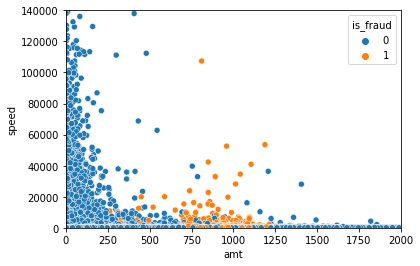

In [ ]:
#plotting the amount vs speed 
scatterPlot=sns.scatterplot(x="amt",y="speed",hue="is_fraud",data=df)
#setting the x and y axis limits
scatterPlot.set(xlim=(0,2000))
scatterPlot.set(ylim=(0,140000))

plt.show()

we can clearly see that he fraud or not is not that much dependent of the speed of the distance between last two distance and the time difference

In [ ]:
#asumming that the max speed that it can achive is 900 km/h above which it would be decleared as a fraud 
#Checking our assumptions with the actual result  
#we can see it is giving a very low accuracy

each_data = df[df.is_fraud==1]
len(each_data[each_data.speed > 900]) /len(each_data)

0.045563549160671464

In [ ]:
unique_cards #unique credit cards numbers and no of transactions each card

,cc_num,no of time
0,60416207185,1518
1,60422928733,1531
2,60423098130,510
3,60427851591,528
4,60487002085,496
...,...,...
978,4958589671582726883,1476
979,4973530368125489546,1040
980,4980323467523543940,532
981,4989847570577635369,1007


In [ ]:
#declearning an empty directory for storing the accuracy socres of each credit card

credit_score = []

In [ ]:
#checking the unique cards and there corresponding accuracy based on rules
for num in unique_cards.cc_num:
    each_card=df[df.cc_num==num]
    each_card_fraud=each_card[each_card.is_fraud==1]
    if len(each_card_fraud)!=0:
        credit_score.append(len(each_card_fraud[each_card_fraud.speed > 900]) / len(each_card_fraud))

In [ ]:
#the max accuracy for a individual credit card
credit_score[np.argmax(np.array(credit_score))]

0.3333333333333333

0.3333333333333333